# WORLD POPULATION PREDICTION

In [1]:
#Importing libraries
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# LOADING THE DATA

In [2]:
data = pd.read_csv('world_population.csv')
data.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
#Dropping unecessary columns

data.drop(data[['Capital','Rank','CCA3']], axis=1, inplace=True)
data.head()

,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


# EDA

In [4]:
#Appending a Total Sum for each column (2022 Population to 1970 Population)

data_pop = data.copy()
data_pop.loc['Total World Population']= data.sum(numeric_only=True, axis=0)
data_pop

,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,Afghanistan,Asia,4.112877e+07,3.897223e+07,3.375350e+07,2.818967e+07,1.954298e+07,1.069480e+07,1.248663e+07,1.075297e+07,652230.0,63.0587,1.0257,0.52
1,Albania,Europe,2.842321e+06,2.866849e+06,2.882481e+06,2.913399e+06,3.182021e+06,3.295066e+06,2.941651e+06,2.324731e+06,28748.0,98.8702,0.9957,0.04
2,Algeria,Africa,4.490322e+07,4.345167e+07,3.954315e+07,3.585634e+07,3.077462e+07,2.551807e+07,1.873938e+07,1.379592e+07,2381741.0,18.8531,1.0164,0.56
3,American Samoa,Oceania,4.427300e+04,4.618900e+04,5.136800e+04,5.484900e+04,5.823000e+04,4.781800e+04,3.288600e+04,2.707500e+04,199.0,222.4774,0.9831,0.00
4,Andorra,Europe,7.982400e+04,7.770000e+04,7.174600e+04,7.151900e+04,6.609700e+04,5.356900e+04,3.561100e+04,1.986000e+04,468.0,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Western Sahara,Africa,5.759860e+05,5.560480e+05,4.918240e+05,4.132960e+05,2.703750e+05,1.785290e+05,1.167750e+05,7.637100e+04,266000.0,2.1654,1.0184,0.01
231,Yemen,Asia,3.369661e+07,3.228405e+07,2.851654e+07,2.474395e+07,1.862870e+07,1.337512e+07,9.204938e+06,6.843607e+06,527968.0,63.8232,1.0217,0.42
232,Zambia,Africa,2.001768e+07,1.892772e+07,1.624823e+07,1.379209e+07,9.891136e+06,7.686401e+06,5.720438e+06,4.281671e+06,752612.0,26.5976,1.0280,0.25
233,Zimbabwe,Africa,1.632054e+07,1.566967e+07,1.415494e+07,1.283977e+07,1.183468e+07,1.011389e+07,7.049926e+06,5.202918e+06,390757.0,41.7665,1.0204,0.20


In [5]:
#Dropping all columns that are not world population

data_pop.drop(data_pop[['Country','Continent','Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage']], axis=1, inplace=True)
data_pop

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,4.112877e+07,3.897223e+07,3.375350e+07,2.818967e+07,1.954298e+07,1.069480e+07,1.248663e+07,1.075297e+07
1,2.842321e+06,2.866849e+06,2.882481e+06,2.913399e+06,3.182021e+06,3.295066e+06,2.941651e+06,2.324731e+06
2,4.490322e+07,4.345167e+07,3.954315e+07,3.585634e+07,3.077462e+07,2.551807e+07,1.873938e+07,1.379592e+07
3,4.427300e+04,4.618900e+04,5.136800e+04,5.484900e+04,5.823000e+04,4.781800e+04,3.288600e+04,2.707500e+04
4,7.982400e+04,7.770000e+04,7.174600e+04,7.151900e+04,6.609700e+04,5.356900e+04,3.561100e+04,1.986000e+04
...,...,...,...,...,...,...,...,...
230,5.759860e+05,5.560480e+05,4.918240e+05,4.132960e+05,2.703750e+05,1.785290e+05,1.167750e+05,7.637100e+04
231,3.369661e+07,3.228405e+07,2.851654e+07,2.474395e+07,1.862870e+07,1.337512e+07,9.204938e+06,6.843607e+06
232,2.001768e+07,1.892772e+07,1.624823e+07,1.379209e+07,9.891136e+06,7.686401e+06,5.720438e+06,4.281671e+06
233,1.632054e+07,1.566967e+07,1.415494e+07,1.283977e+07,1.183468e+07,1.011389e+07,7.049926e+06,5.202918e+06


In [6]:
data.describe()

,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [7]:
#How big our data is:
data.shape

(234, 14)

In [9]:
#Checking the type of data we have here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      234 non-null    object 
 1   Continent                    234 non-null    object 
 2   2022 Population              234 non-null    int64  
 3   2020 Population              234 non-null    int64  
 4   2015 Population              234 non-null    int64  
 5   2010 Population              234 non-null    int64  
 6   2000 Population              234 non-null    int64  
 7   1990 Population              234 non-null    int64  
 8   1980 Population              234 non-null    int64  
 9   1970 Population              234 non-null    int64  
 10  Area (km²)                   234 non-null    int64  
 11  Density (per km²)            234 non-null    float64
 12  Growth Rate                  234 non-null    float64
 13  World Population Per

In [10]:
#Do we have any null value?
data.isna()

,Country,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,False,False,False,False,False,False,False,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False,False,False,False,False,False,False,False
232,False,False,False,False,False,False,False,False,False,False,False,False,False,False


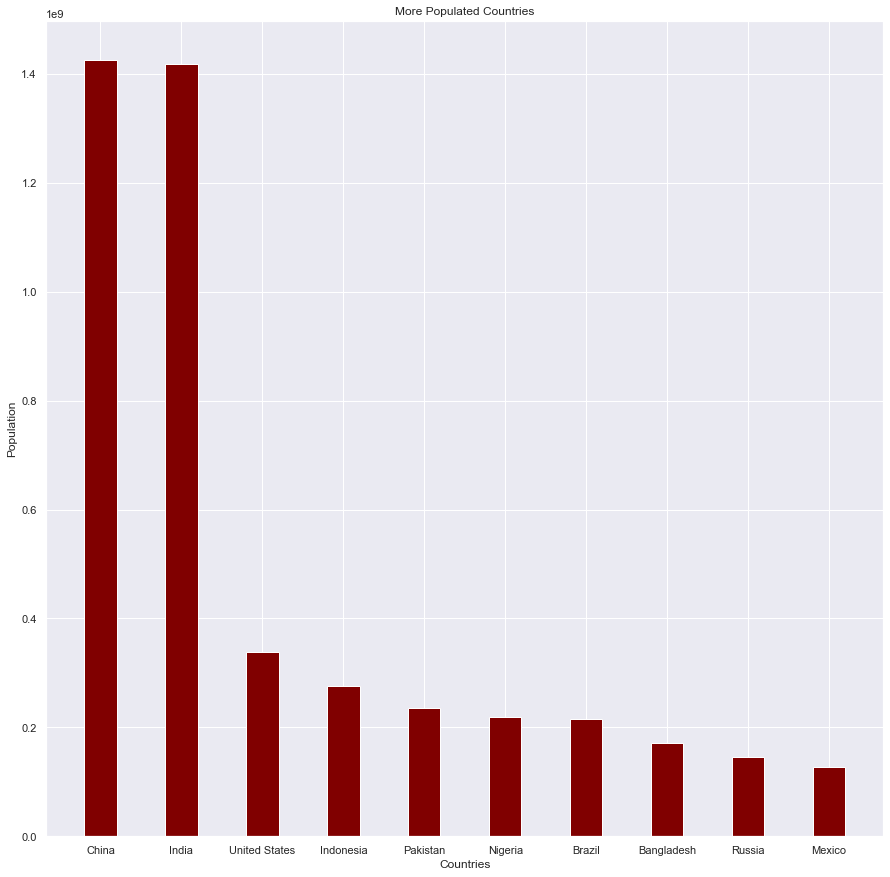

In [11]:
#Let's plot a bar graph to visualize the data

#10 More populated countries

pop_desc = data.sort_values('2022 Population', ascending=False)

data_more=pop_desc.head(10)

plt.figure(figsize=(15,15))
plt.bar(data_more['Country'], data_more['2022 Population'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Countries")
plt.ylabel("Population")
plt.title("More Populated Countries")
plt.show()

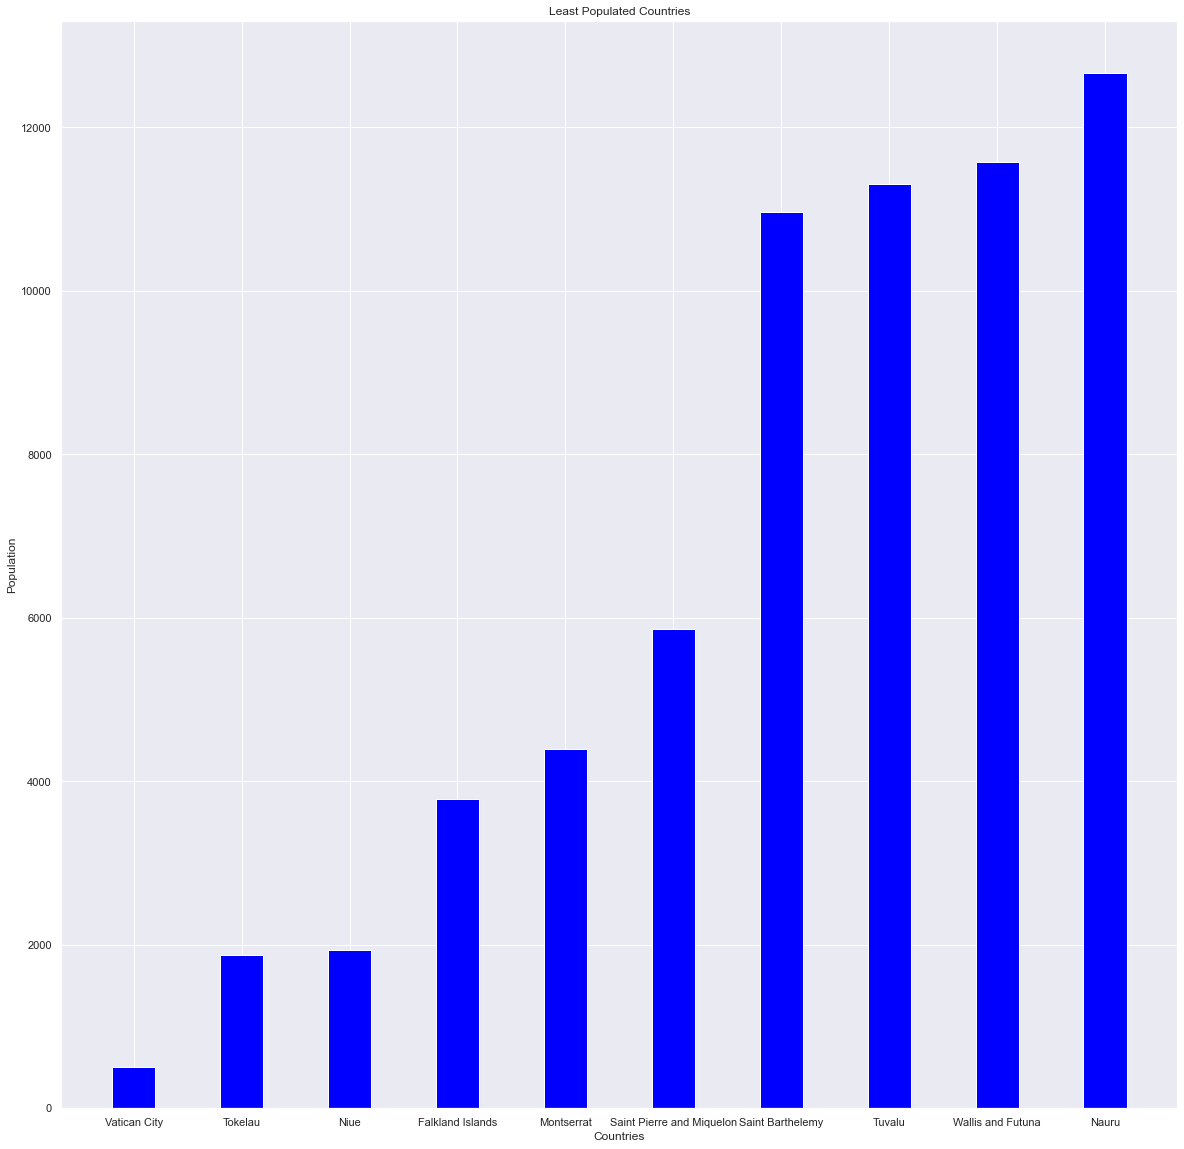

In [12]:
#10 most populated countries in 2022
pop_asc = data.sort_values('2022 Population')

data_least=pop_asc.head(10)

plt.figure(figsize=(20,20))
plt.bar(data_least['Country'], data_least['2022 Population'], color ='blue',
        width = 0.4)
 
plt.xlabel("Countries")
plt.ylabel("Population")
plt.title("Least Populated Countries")
plt.show()

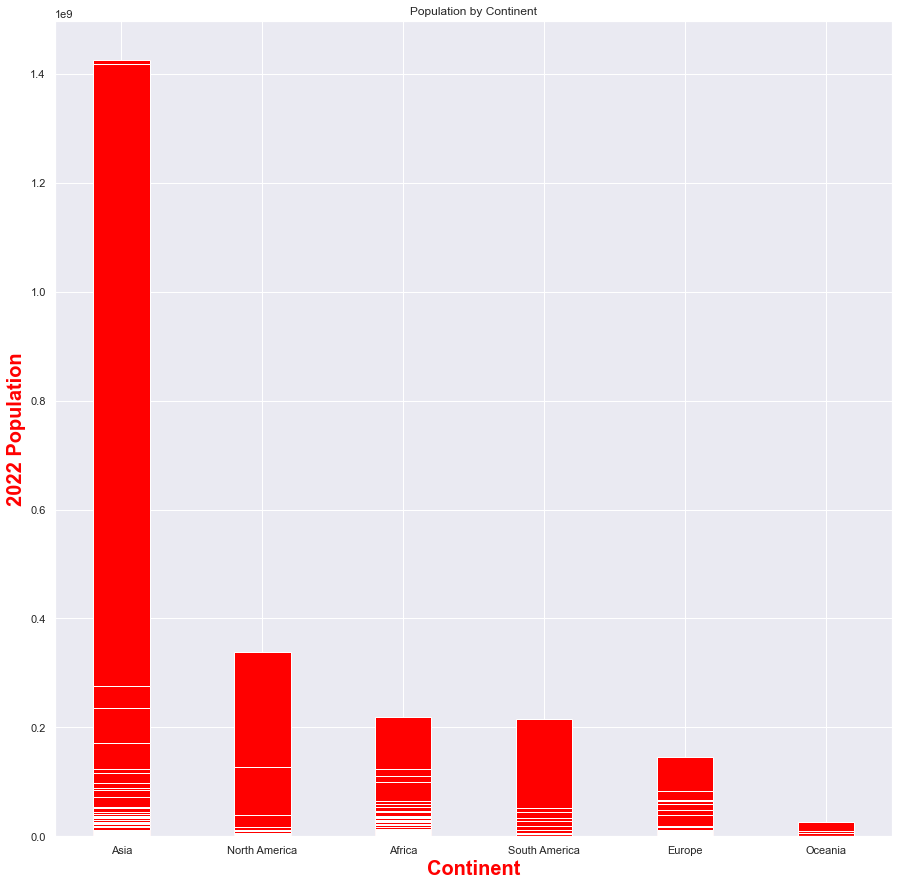

In [13]:
#Let's analyze every continent by population in 2022

continent = data.sort_values('2022 Population', ascending=False)

plt.figure(figsize=(15,15))

x = continent['Continent']
y = continent['2022 Population']

plt.bar(x, y, color ='red', width = 0.4)
 
plt.xlabel("Continent", color = 'red', fontweight = 'bold', fontsize = 20)
plt.ylabel("2022 Population", color = 'red', fontweight = 'bold', fontsize = 20)
plt.title("Population by Continent")
    
plt.show()

In [14]:
#Calculation the population in each continent

data.groupby('Continent')['2022 Population'].sum()


Continent
Africa           1426730932
Asia             4721383274
Europe            743147538
North America     600296136
Oceania            45038554
South America     436816608
Name: 2022 Population, dtype: int64

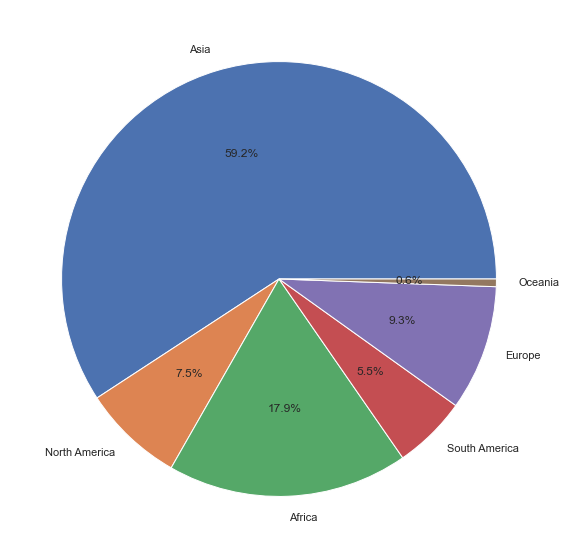

In [15]:
#Building a pie chart

asia_population = 4721383274
na_population = 600296136
africa_population = 1426730932
sa_population = 436816608
europe_population = 743147538
oceania_population = 45038554

population_total = asia_population + na_population + africa_population + sa_population + europe_population + oceania_population

pct_asia = (asia_population / population_total) * 100 
pct_na = (na_population / population_total) * 100 
pct_africa = (africa_population / population_total) * 100 
pct_sa = (sa_population / population_total) * 100
pct_europe = (europe_population / population_total) * 100
pct_oceania = (oceania_population / population_total) * 100

#Pie Chart of Population in 2022

plt.figure(figsize=(10,10))
labels = ["Asia", "North America", "Africa", "South America", "Europe", "Oceania"]
values = [pct_asia, pct_na, pct_africa, pct_sa, pct_europe, pct_oceania] 
plt.pie(values, labels=labels, autopct="%.1f%%")
plt.show()

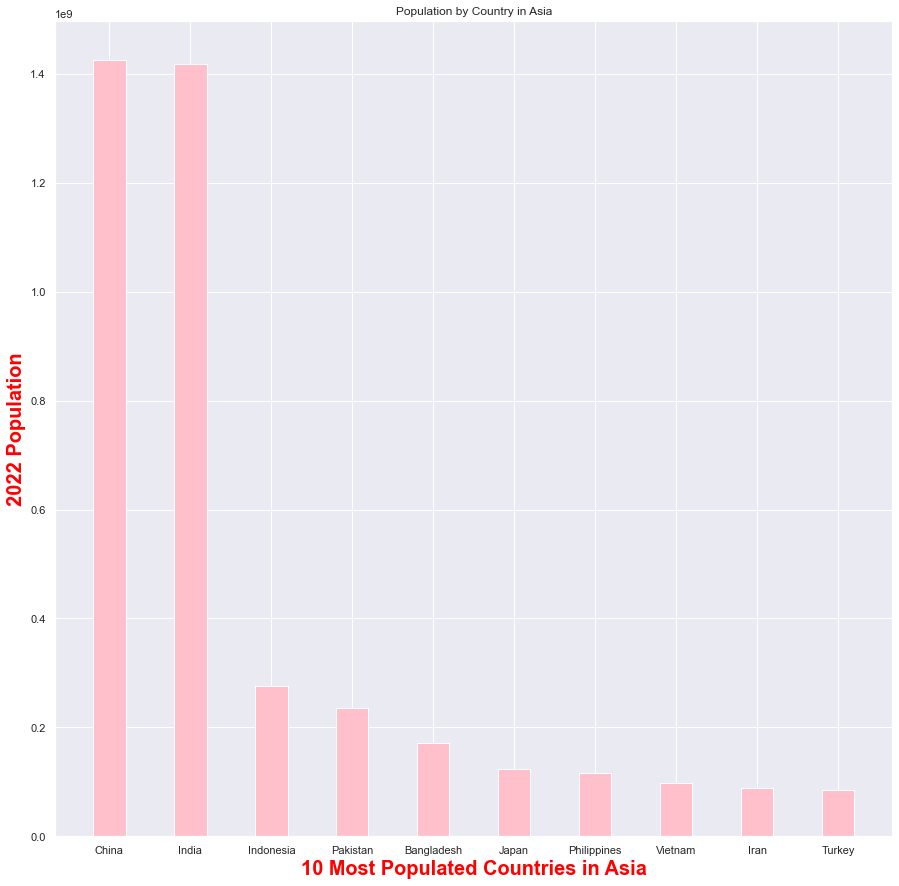

In [16]:
#Analyzing Asia in 2022

continent_calc = data.sort_values('2022 Population', ascending=False)

plt.figure(figsize=(15,15))

region = continent_calc.loc[continent_calc['Continent'] == 'Asia']
region_asia = region.head(10)

x = region_asia['Country']
y = region_asia['2022 Population']

plt.bar(x, y, color ='pink', width = 0.4)
 
plt.xlabel("10 Most Populated Countries in Asia", color = 'red', fontweight = 'bold', fontsize = 20)
plt.ylabel("2022 Population", color = 'red', fontweight = 'bold', fontsize = 20)
plt.title("Population by Country in Asia")
    
plt.show()


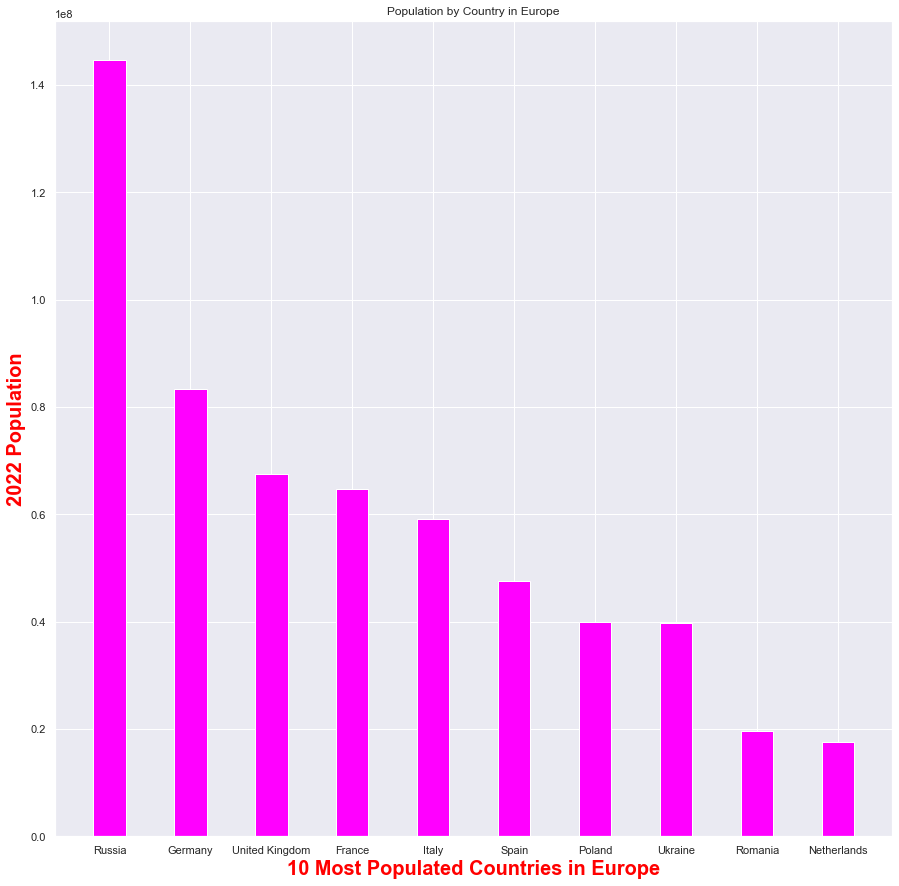

In [17]:
#Analyzing Europe in 2022

continent_calc = data.sort_values('2022 Population', ascending=False)

plt.figure(figsize=(15,15))

region = continent_calc.loc[continent_calc['Continent'] == 'Europe']
region_europe = region.head(10)

x = region_europe['Country']
y = region_europe['2022 Population']

plt.bar(x, y, color ='magenta', width = 0.4)
 
plt.xlabel("10 Most Populated Countries in Europe", color = 'red', fontweight = 'bold', fontsize = 20)
plt.ylabel("2022 Population", color = 'red', fontweight = 'bold', fontsize = 20)
plt.title("Population by Country in Europe")
    
plt.show()

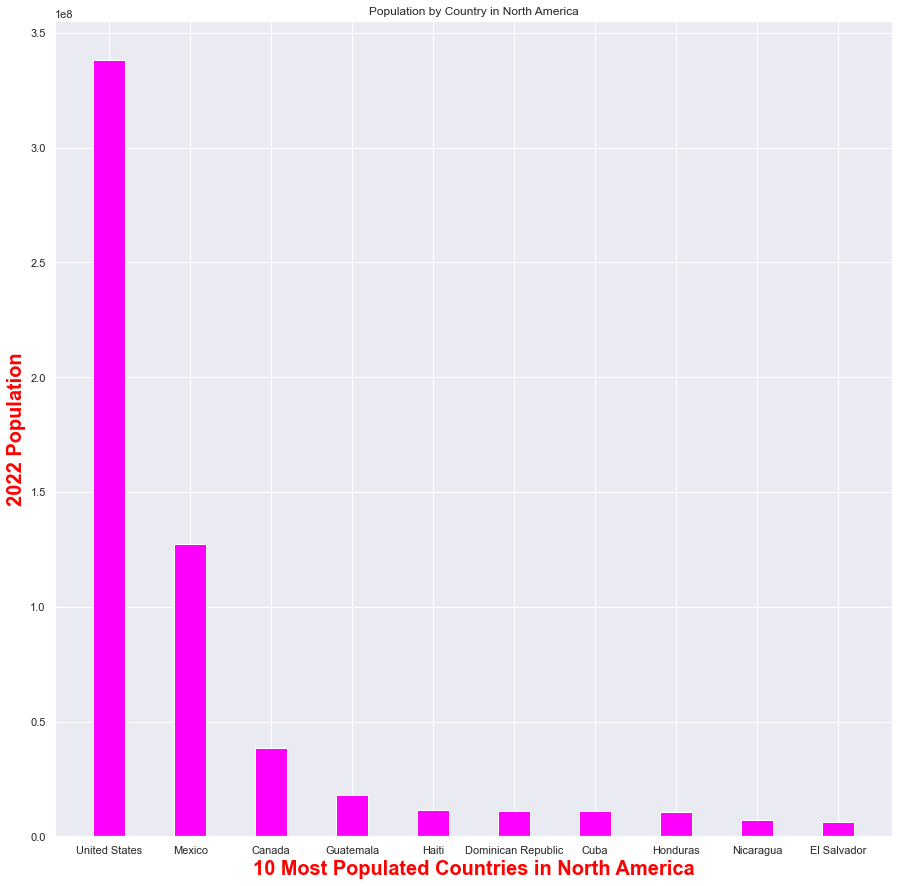

In [18]:
#Analyzing North America in 2022

continent_calc = data.sort_values('2022 Population', ascending=False)

plt.figure(figsize=(15,15))

region = continent_calc.loc[continent_calc['Continent'] == 'North America']
region_na = region.head(10)

x = region_na['Country']
y = region_na['2022 Population']

plt.bar(x, y, color ='magenta', width = 0.4)
 
plt.xlabel("10 Most Populated Countries in North America", color = 'red', fontweight = 'bold', fontsize = 20)
plt.ylabel("2022 Population", color = 'red', fontweight = 'bold', fontsize = 20)
plt.title("Population by Country in North America")
    
plt.show()



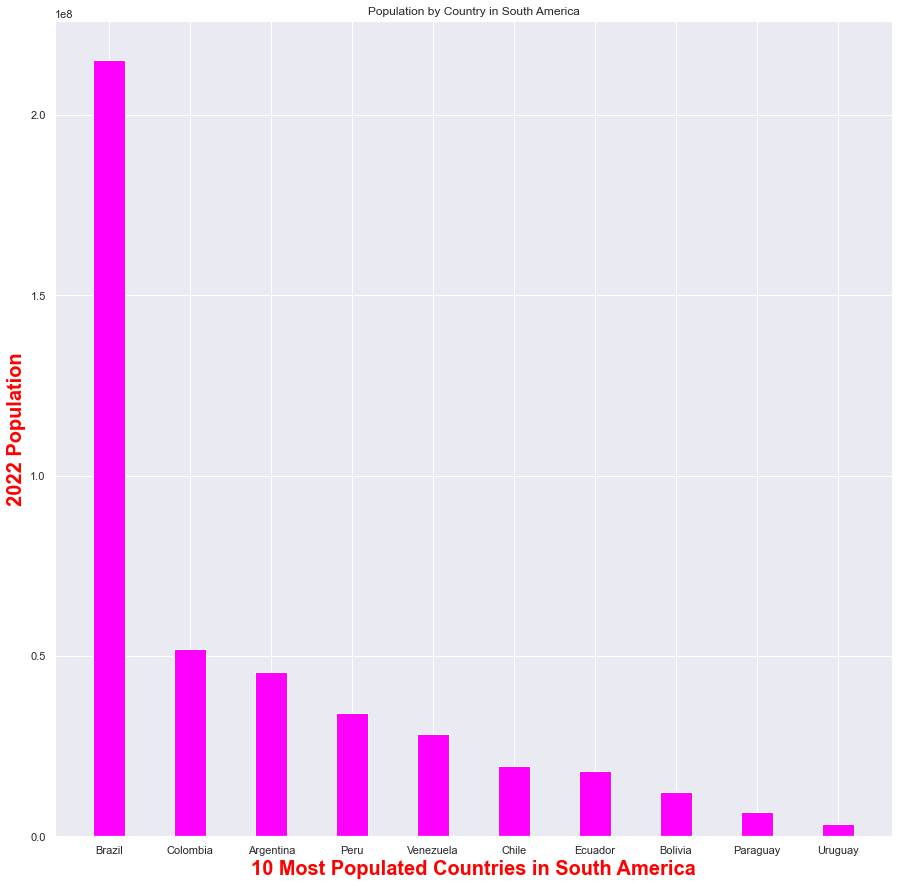

In [19]:
#Analyzing South America in 2022

continent_calc = data.sort_values('2022 Population', ascending=False)

plt.figure(figsize=(15,15))

region = continent_calc.loc[continent_calc['Continent'] == 'South America']
region_sa = region.head(10)

x = region_sa['Country']
y = region_sa['2022 Population']

plt.bar(x, y, color ='magenta', width = 0.4)
 
plt.xlabel("10 Most Populated Countries in South America", color = 'red', fontweight = 'bold', fontsize = 20)
plt.ylabel("2022 Population", color = 'red', fontweight = 'bold', fontsize = 20)
plt.title("Population by Country in South America")
    
plt.show()

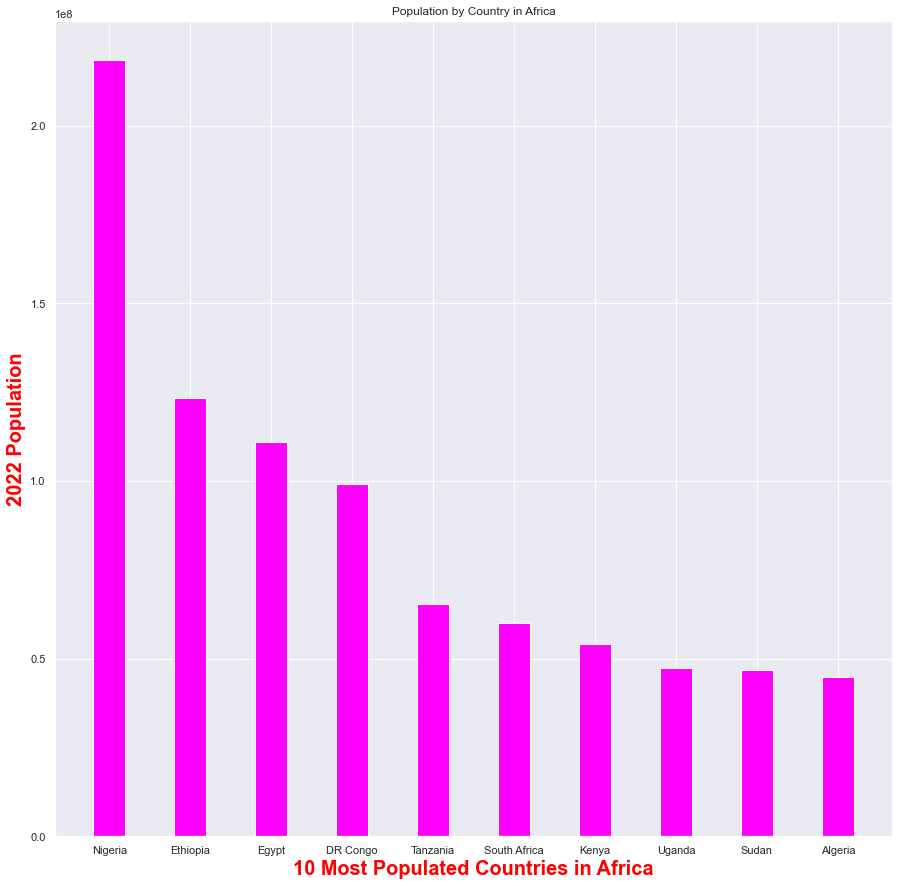

In [20]:
#Analyzing Africa in 2022

continent_calc = data.sort_values('2022 Population', ascending=False)

plt.figure(figsize=(15,15))

region = continent_calc.loc[continent_calc['Continent'] == 'Africa']
region_africa = region.head(10)

x = region_africa['Country']
y = region_africa['2022 Population']

plt.bar(x, y, color ='magenta', width = 0.4)
 
plt.xlabel("10 Most Populated Countries in Africa", color = 'red', fontweight = 'bold', fontsize = 20)
plt.ylabel("2022 Population", color = 'red', fontweight = 'bold', fontsize = 20)
plt.title("Population by Country in Africa")
    
plt.show()

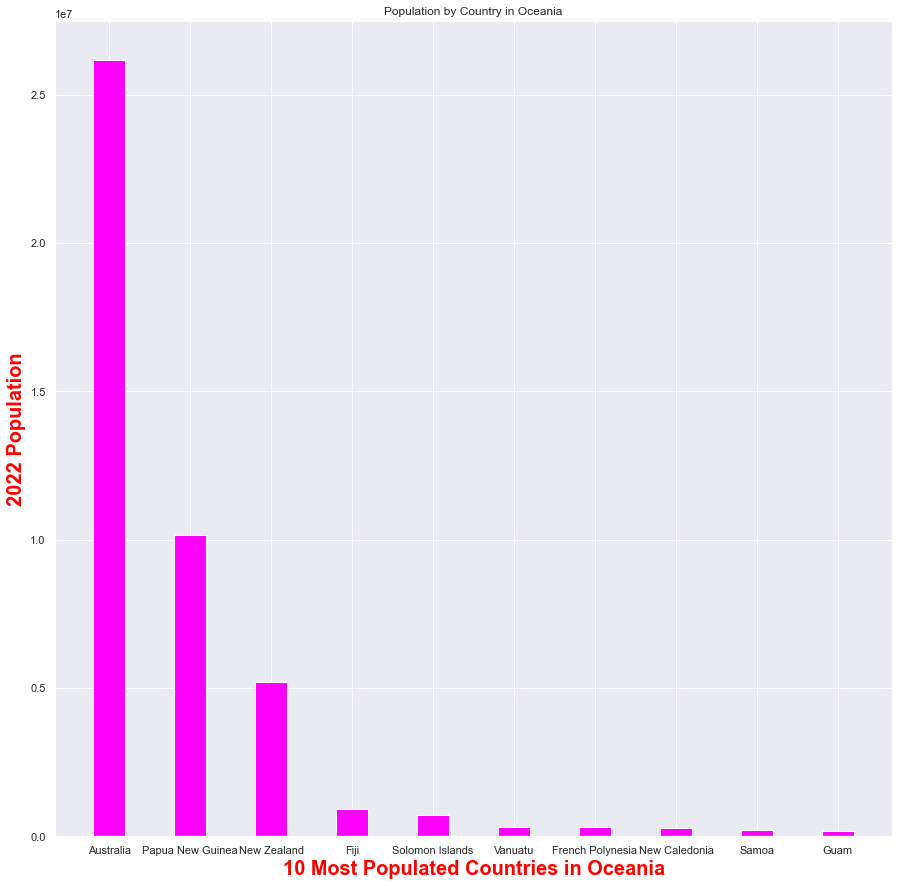

In [21]:
#Analyzing Oceania in 2022

continent_calc = data.sort_values('2022 Population', ascending=False)

plt.figure(figsize=(15,15))

region = continent_calc.loc[continent_calc['Continent'] == 'Oceania']
region_oceania = region.head(10)

x = region_oceania['Country']
y = region_oceania['2022 Population']

plt.bar(x, y, color ='magenta', width = 0.4)
 
plt.xlabel("10 Most Populated Countries in Oceania", color = 'red', fontweight = 'bold', fontsize = 20)
plt.ylabel("2022 Population", color = 'red', fontweight = 'bold', fontsize = 20)
plt.title("Population by Country in Oceania")
    
plt.show()

Let's have a look on the timeline of continent-wise population :


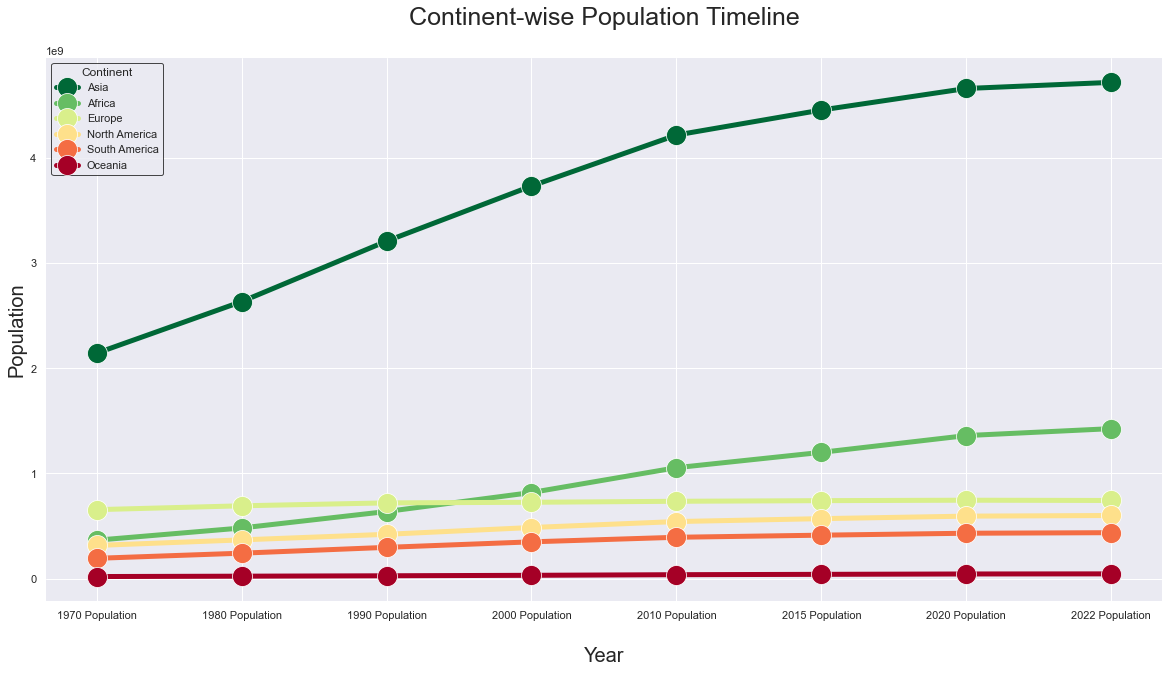

In [23]:
#Making a copy of the dataset
data_by_cont = data.copy()
data_by_cont = pd.DataFrame(data_by_cont.groupby(["Continent"])["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population"].sum())

print(f"Let's have a look on the timeline of continent-wise population :")
_, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_by_cont.T.index ,y=data_by_cont.T["Asia"],data=data_by_cont.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_by_cont.T.index ,y=data_by_cont.T["Africa"],data=data_by_cont.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_by_cont.T.index ,y=data_by_cont.T["Europe"],data=data_by_cont.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_by_cont.T.index ,y=data_by_cont.T["North America"],data=data_by_cont.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_by_cont.T.index ,y=data_by_cont.T["South America"],data=data_by_cont.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_by_cont.T.index ,y=data_by_cont.T["Oceania"],data=data_by_cont.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)



axs.set_title("Continent-wise Population Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")
# axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()

### We can see that every continent presents a population increase, specially ASIA and Africa

Let's have a look on the timeline of continent-wise population density :


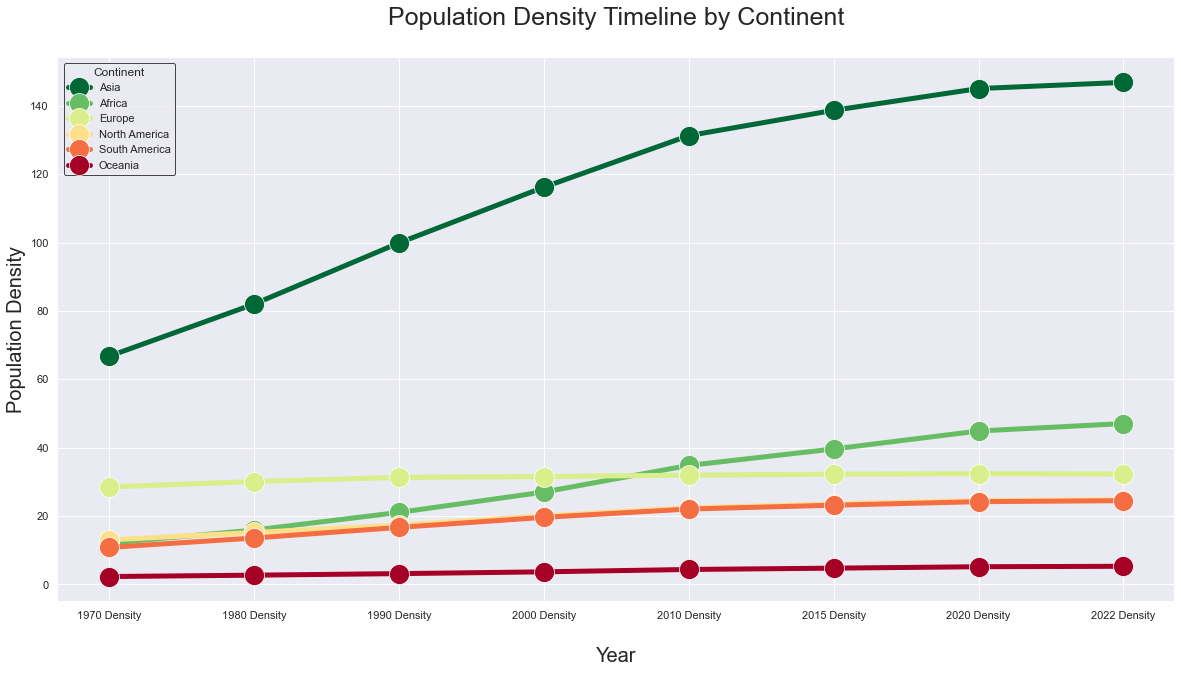

In [24]:
#Let's visualize population density trend 
data_den = data.copy()

data_den = pd.DataFrame(data_den.groupby(["Continent"])["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population","Area (km²)"].sum())

col = ["1970 Population","1980 Population","1990 Population","2000 Population","2010 Population","2015 Population","2020 Population","2022 Population"]

for i in col:
    data_den[i] = data_den[i]/data_den["Area (km²)"]    
data_den.rename(columns={"1970 Population":"1970 Density","1980 Population":"1980 Density","1990 Population":"1990 Density","2000 Population":"2000 Density","2010 Population":"2010 Density","2015 Population":"2015 Density","2020 Population":"2020 Density","2022 Population":"2022 Density"},inplace=True)

data_den.drop(columns="Area (km²)",inplace=True)


print(f"Let's have a look on the timeline of continent-wise population density :")
_, axs = plt.subplots(figsize=(20,10))

sns.lineplot(x=data_den.T.index ,y=data_den.T["Asia"],data=data_den.T,ax=axs,color="#006837",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Africa"],data=data_den.T,ax=axs,color="#66BD63",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Europe"],data=data_den.T,ax=axs,color="#D9EF8B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["North America"],data=data_den.T,ax=axs,color="#FEE08B",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["South America"],data=data_den.T,ax=axs,color="#F46D43",marker="o",linewidth=5,markersize=20)
sns.lineplot(x=data_den.T.index ,y=data_den.T["Oceania"],data=data_den.T,ax=axs,color="#A50026",marker="o",linewidth=5,markersize=20)

axs.set_title("Population Density Timeline by Continent\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("Population Density",fontsize=20)
axs.legend(["Asia","Africa","Europe","North America","South America","Oceania"],title="Continent", edgecolor = "#1c1c1c")

sns.despine(left=True, bottom=True)
plt.show()

## Population Density is on the rise specially in Asia

Let's have a look on the population growth rate :


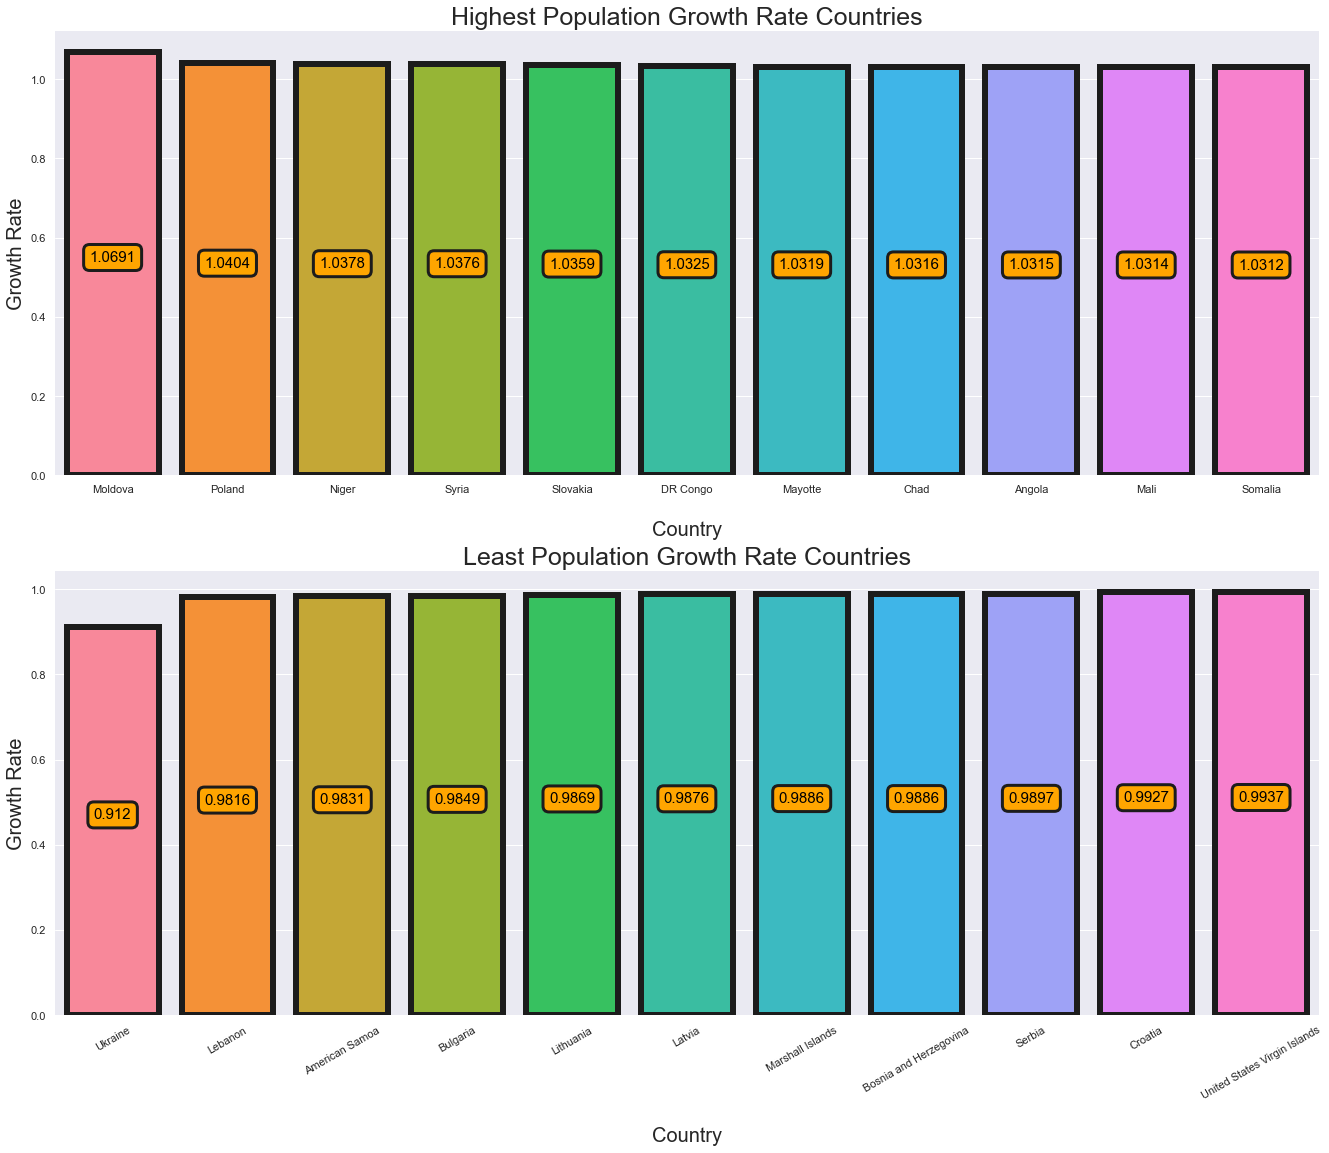

In [25]:
print(f"Let's have a look on the population growth rate :")

_, axs = plt.subplots(2,1,figsize=(20,16))
plt.tight_layout(pad=6.0)

sns.barplot(x=data["Country"],y=data["Growth Rate"],order=data.sort_values("Growth Rate",ascending=False)["Country"][:11],ax=axs[0], saturation=1,edgecolor = "#1c1c1c", linewidth = 6)

axs[0].set_yscale("linear")
axs[0].set_title("Highest Population Growth Rate Countries",fontsize=25)
axs[0].set_xlabel("\nCountry",fontsize=20)
axs[0].set_ylabel("Growth Rate",fontsize=20)
axs[0].set_xticklabels(axs[0].get_xticklabels(),rotation = 0)

for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.barplot(x=data["Country"],y=data["Growth Rate"],order=data.sort_values("Growth Rate",ascending=True)["Country"][:11],ax=axs[1], saturation=1,edgecolor = "#1c1c1c", linewidth = 6)

axs[1].set_yscale("linear")
axs[1].set_title("Least Population Growth Rate Countries",fontsize=25)
axs[1].set_xlabel("\nCountry",fontsize=20)
axs[1].set_ylabel("Growth Rate",fontsize=20)
axs[1].set_xticklabels(axs[1].get_xticklabels(),rotation = 30)

for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "#1c1c1c", "linewidth" : 3, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

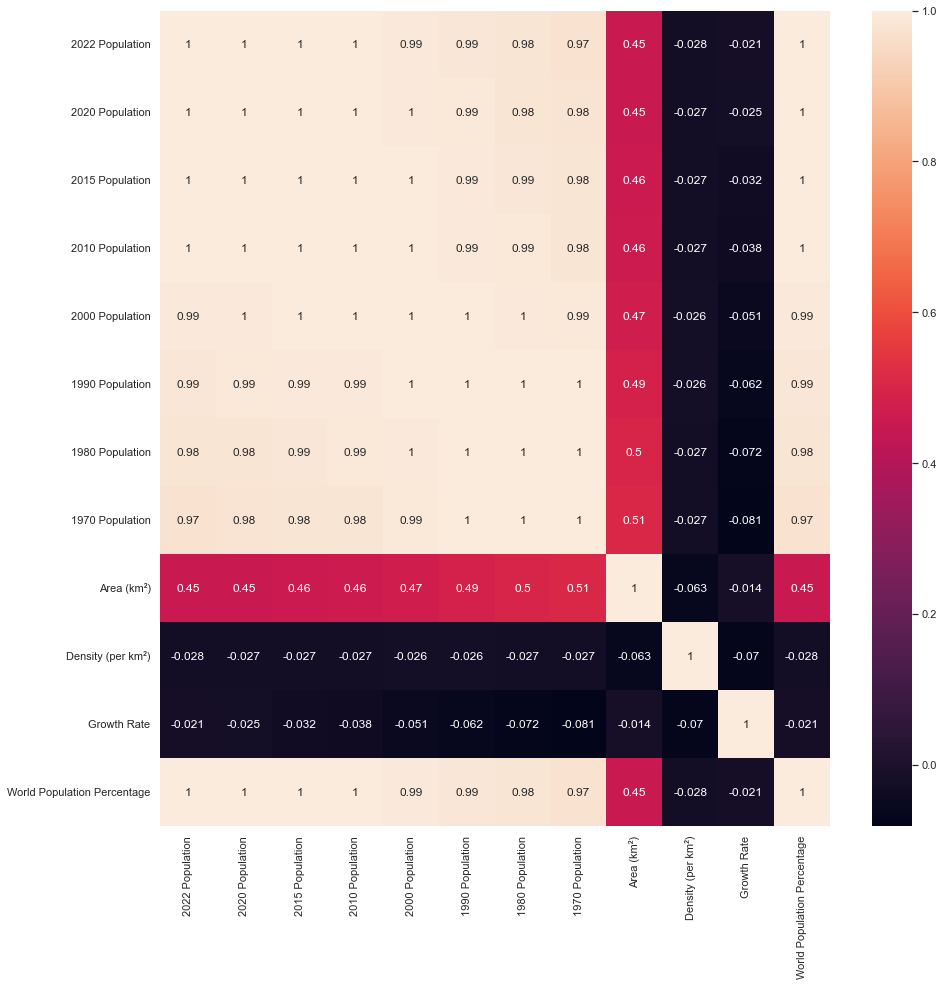

In [26]:
#Building a correlation matrix

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [27]:
data_by_cont

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Africa,365444348,481536377,638150629,818946032,1055228072,1201102442,1360671810,1426730932
Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4458250182,4663086535,4721383274
Europe,655923991,692527159,720320797,726093423,735613934,741535608,745792196,743147538
North America,315434606,368293361,421266425,486069584,542720651,570383850,594236593,600296136
Oceania,19480270,22920240,26743822,31222778,37102764,40403283,43933426,45038554
South America,192947156,241789006,297146415,349634282,393078250,413134396,431530043,436816608


In [28]:
#Creating a copy of the dataset
world_pop = data_by_cont.copy()

#Creating a sum row for every year
world_pop.loc['World Pop Total'] = world_pop.iloc[:, :].sum()
world_pop

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,2022 Population
Continent,,,,,,,,
Africa,365444348,481536377,638150629,818946032,1055228072,1201102442,1360671810,1426730932
Asia,2144906290,2635334228,3210563577,3735089604,4220041327,4458250182,4663086535,4721383274
Europe,655923991,692527159,720320797,726093423,735613934,741535608,745792196,743147538
North America,315434606,368293361,421266425,486069584,542720651,570383850,594236593,600296136
Oceania,19480270,22920240,26743822,31222778,37102764,40403283,43933426,45038554
South America,192947156,241789006,297146415,349634282,393078250,413134396,431530043,436816608
World Pop Total,3694136661,4442400371,5314191665,6147055703,6983784998,7424809761,7839250603,7973413042


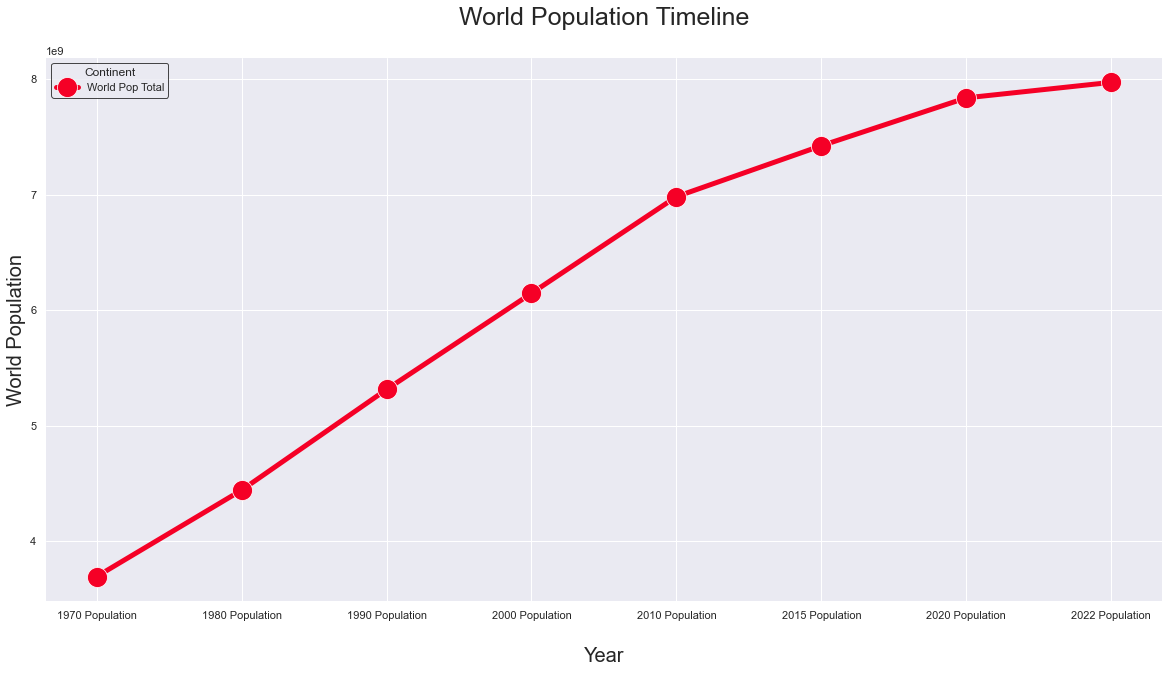

In [29]:
#Plotting Wold population total and Year

_, axs = plt.subplots(figsize=(20,10))


sns.lineplot(x=world_pop.T.index ,y=world_pop.T["World Pop Total"],data=world_pop.T,ax=axs,color="#F50026",marker="o",linewidth=5,markersize=20)



axs.set_title("World Population Timeline\n",fontsize=25)
axs.set_xlabel("\nYear",fontsize=20)
axs.set_ylabel("World Population",fontsize=20)
axs.legend(["World Pop Total"],title="Continent", edgecolor = "#1c1c1c")
# axs.set_xticks([],minor=False)

sns.despine(left=True, bottom=True)
plt.show()